In [63]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('cleaned_filename.csv')

In [64]:
# defining X,y dataframe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [65]:
X.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [66]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [67]:
# scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [68]:
import numpy as np
# Define the range of components to test
n_components = np.arange(1, X_train.shape[1]+1)

In [69]:
# Initialize variables to store results
best_n_components = 0
best_score = 0

In [70]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Loop over the range of components
for n in n_components:
    # Initialize PCA
    pca = PCA(n_components=n)

    # Fit and transform the data using PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a KNN classifier on the transformed data
    knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
    knn.fit(X_train_pca, y_train)

    # Evaluate the accuracy on the test set
    score = accuracy_score(y_test,knn.predict(X_test_pca))

    # Update best number of components and best score if needed
    if score > best_score:
        best_n_components = n
        best_score = score

In [71]:
# Print the best number of components and corresponding accuracy
print(f"Best number of components: {best_n_components}")
print(f"Accuracy with {best_n_components} components: {best_score:.3f}")

Best number of components: 28
Accuracy with 28 components: 0.922


## evaluation

## training the model using 28 components

In [72]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

In [78]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(X)

In [79]:
# to check the ratio of useful information from each component
pca.explained_variance_ratio_

array([9.25462124e-01, 7.25628565e-02, 1.91461108e-03, 1.02871745e-05,
       7.15868722e-06, 5.96776876e-06, 4.31590230e-06, 3.07452869e-06,
       2.73159273e-06, 2.46162940e-06, 2.11290985e-06, 1.90628012e-06,
       1.72724151e-06, 1.64303087e-06, 1.50734684e-06, 1.34003929e-06,
       1.16686821e-06, 1.03368979e-06, 1.01243801e-06, 9.52723916e-07,
       7.57505846e-07, 7.25190004e-07, 6.35846371e-07, 5.75845224e-07,
       5.33692847e-07, 4.76478581e-07, 4.57063096e-07, 4.31070722e-07])

In [85]:
# train test split
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [86]:
model = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')

In [87]:
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.8218527315914489

### confusion matrix

In [89]:
y_predicted = model.predict(X_test_pca)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(60.222222222222214, 0.5, 'Truth')

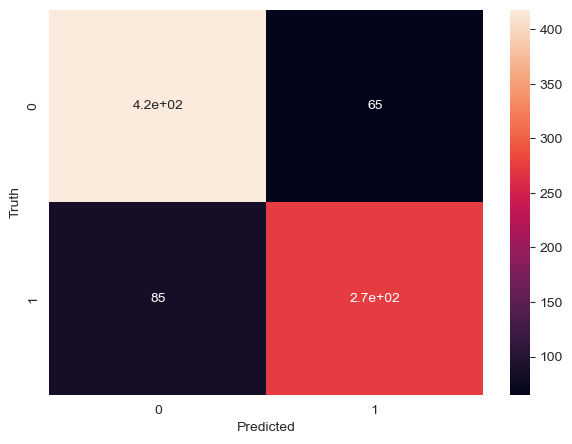

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### classification report

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       483
           1       0.81      0.76      0.79       359

    accuracy                           0.82       842
   macro avg       0.82      0.81      0.82       842
weighted avg       0.82      0.82      0.82       842



### ROC curve

In [93]:
# predict probabilities on test set
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

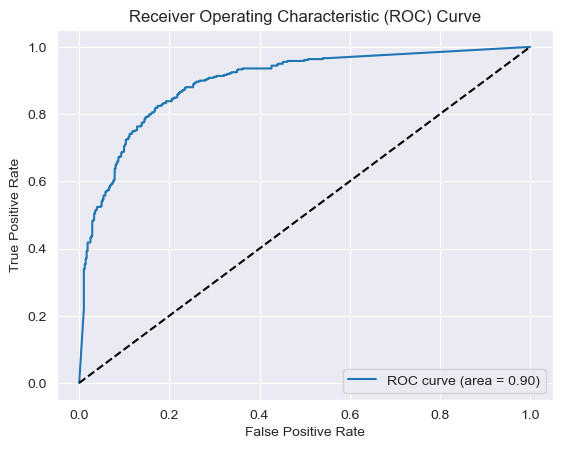

In [95]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()